In [7]:
import warnings
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]
TensorFlow version :  2.5.0
Keras version :  2.5.0


In [3]:
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
H, W = 28, 28
input_shape = (H, W , 1)
x_train = x_train.reshape(x_train.shape[0], H, W, 1)
x_test = x_test.reshape(x_test.shape[0], H, W, 1)

# normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 하이퍼 파라미터
batch_size = 128
max_epochs = 10
output_size = 10

t_train = keras.utils.to_categorical(t_train, output_size)
t_test = keras.utils.to_categorical(t_test, output_size)

print(x_train.shape)
print(x_test.shape)

print(t_train.shape)
print(t_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


# 모델링

최대한 밑시딥 250 페이지랑 비슷하게 맞춤..

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(output_size, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               627300    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 629,142
Trainable params: 629,142
Non-trainable params: 0
________________________________________________

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, t_train,
          batch_size=batch_size, epochs=max_epochs,
          verbose=1, validation_data=(x_test, t_test))

Epoch 1/10
469/469 [==============================] - 60s 94ms/step - loss: 0.4460 - accuracy: 0.8707 - val_loss: 0.0724 - val_accuracy: 0.9785
Epoch 2/10
469/469 [==============================] - 43s 93ms/step - loss: 0.0788 - accuracy: 0.9760 - val_loss: 0.0524 - val_accuracy: 0.9819
Epoch 3/10
469/469 [==============================] - 43s 92ms/step - loss: 0.0499 - accuracy: 0.9843 - val_loss: 0.0503 - val_accuracy: 0.9850
Epoch 4/10
469/469 [==============================] - 43s 91ms/step - loss: 0.0376 - accuracy: 0.9881 - val_loss: 0.0385 - val_accuracy: 0.9872
Epoch 5/10
469/469 [==============================] - 43s 92ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0394 - val_accuracy: 0.9875
Epoch 6/10
469/469 [==============================] - 43s 92ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 0.0348 - val_accuracy: 0.9883
Epoch 7/10
469/469 [==============================] - 43s 92ms/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.0337 - val_accuracy:

In [10]:
score = model.evaluate(x_test, t_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy : {score[1]*100}%')

Test loss: 0.03453705832362175
Test accuracy : 99.01000261306763%


0.0
테스트 케이스 20번째 데이터로 예측한 결과 : [9]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


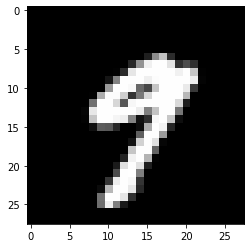

In [18]:
n = 20
img = x_test[n].reshape(28,28)
plt.imshow(img , cmap='gray')
print(img[5, 5])

result = model.predict_classes(x_test[n].reshape(1, 28, 28, 1))

print(f'테스트 케이스 {n}번째 데이터로 예측한 결과 : {result}')

In [13]:
path = '/content/drive/MyDrive/deep-learning-from-scratch-master/SimpleCNN.h5'
model.save(path)